<a href="https://colab.research.google.com/github/JuanDavid1703/Proyecto_INtroducci-n_ciencia-de-datos/blob/main/Proyecto_frailejones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Morfología foliar del frailejón en el sector del páramo del Sumapaz

##Comprensión del negocio

###Individuos claves de la organización
Estudiantes de PEAMA, representantes del Jardín Botánico, de conservación de parque e Ivan Jiménez integrante de Missouri Botanical Garden. 

##Problemática general

<img title="Páramo" src="https://github.com/JuanDavid1703/Proyecto_INtroducci-n_ciencia-de-datos/raw/main/Paramo.jpg" width="500">


Las especies a menudo se consideran unidades básicas de diversidad biológica en ecología, evolución, biogeografía y biología de la conservación (Cardenas 2016); la intervención de la mano del hombre y el cambio climático global está afectando el ecosistema de los páramos en Colombia y en general del territorio suramericano, esto está generando que un familia de plantas que tiene gran predominio en estos terrenos y que  además sirven como interceptación y retención del agua en el suelo, que tienen funciones como la evapotranspiración y la retención del carbono orgánico en el suelo,  la espeletia o mayormente conocida como frailejón, está teniendo una transformación de características debido al cambio de los pisos térmicos y al ser tan dependiente del hábitat en que se encuentra, un cambio en su ecosistema podría acarrear la extinción de ella.

<img title="Pisos térmicos" src="https://github.com/JuanDavid1703/Proyecto_INtroducci-n_ciencia-de-datos/raw/main/Pisostermicos.jpg" width="350">


La necesidad de distinguir el ecosistema en donde se trabaja genera la necesidad de identificar las diferentes especies que componen el ecosistema, para el estudio de caso, dado el predominio de la espeletia en los páramos, es de gran importancia identificar esas diferentes especies.

Existen varios métodos de identificación tanto fenotípica como genotípica, la finalidad de este documento es presentar un método de identificación fenotípica a través de la caracterización de las hojas de cada planta.

Existe una gran variedad en tipos de hojas, esto debido a las formas, bordes y  tipo de venación  que existen en cada una de ellas, la distinción de cada tipo permite aportar a una mejor  clasificación taxonómica de las plantas.


<img src="https://github.com/JuanDavid1703/Proyecto_INtroducci-n_ciencia-de-datos/raw/main/1200px-Leaf_morphology_es.png" width="350">


###Solución actual

*Soluciones actuales:*

Se realizaron cultivos por 5 años de la progenie de las plantas madres de los 6 diferentes grupos fenotípicos descritos en los estudios anteriores como se muestra en la siguiente figura, se segmentaron usando  una  Clave, que es un árbol de decisión para identificar especies la cual es una herramienta estándar en biología (Cuatrecasas).

<img src="https://github.com/JuanDavid1703/Proyecto_INtroducci-n_ciencia-de-datos/raw/main/Bandeja.png" width="350">


*Desventajas y ventajas:*

**Ventajas:**

Mayor inclusión de las personas en la zona como fuente de aprendizaje para que conozcan la importancia de los páramos y lo complicado que llega a ser conocerlo.

**Desventajas**

El tiempo necesario para llegar a resultados, teniendo en cuenta que en 5 años es posible que haya también hibridación


##Definición de objetivos

El objetivo general es identificar los diferentes tipos de hojas que se pueden observar en estas especies recogidas de los sectores del páramo del Sumapaz.\\

El objetivo  específico es determinar si la clasificación por medio de las característica de las hojas dan a lugar a las 6 especies identificadas del estudio anterior, de no ser así definir una clasificación teniendo en cuenta la morfología foliar usano algoritmos de estracción de características de contorno en imágenes; además realizada la clasificación de la especies se procederá a crear una guía para tenerla de base para futuras investigaciones y como una herramienta fundamental para el monitoreo. 

##Evaluación de la situación

*Datos:*

Se recolectaron diferentes registros fotográficos de  538 diferentes especímenes en el páramo de Sumapaz y 165 especímenes de herbarios.Para este estudio se realizará un análisis de la morfología de las hojas en diferentes medidas y tamaños. A cada imagen se le realizará la separación de la hoja con le fondo, algo necesario para poder aplicar el algortimo deseado en la estracción de características de contorno, una pequeña muestra se puede observar en la imagen

<img src="https://github.com/JuanDavid1703/Proyecto_INtroducci-n_ciencia-de-datos/raw/main/primicia.jpg" width="500">

**Riesgos:**

* Dado que se necesitó quitar el fondo de la imagen, algunas imágenes no quedaron con contronos suaves, esto quizas genere un error al momento de la extracción de contornos.

* Es posible que los datos no sean suficientes o no tengan la calidad y la cantidad de características suficientes para realizar la extracción de caracterpisticas de contorno y poder clasificar cada imagen, como recurso opcional se tendrá en cuenta el uso de redes convolucionales como herramienta extra para la extracción de características de imágenes.


#Bibliografía

[1] ***Pineda Yam, Cortés Andrés, Madriñán Santiago, Jiménez Iván***, " *The Nature of Espeletia Species* ", 2020.

[2] ***M. F. Cárdenas Agudelo***, "*Ecohydrology of paramos in Colombia: Vulnerability to climate change and land use*", Universidad Nacional de Colombia 2016.

[3] ***José Cuatrecasas***, "*A systematic study of the subtribe Espeletiinae* ", The New York Botanical Garden Press .\\





#Analisis de imágenes

In [1]:
import skimage.measure as skm
import cmath
import math
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import os
import cv2
import random
from PIL import Image
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist
import warnings
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
ruta ="/content/drive/MyDrive/Proyecto_frilejones/Test/"
imgs = sorted(os.listdir(ruta))
warnings.filterwarnings('ignore')

##Funciones de análisis

In [18]:
def getContour(imName):
  im = cv2.imread(imName)
  imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(imgray,200, 255,0)
  contour=skm.find_contours(thresh,level=0.6, fully_connected="high")
  data=[]
  for points in contour:
    for i in points:
      data.append(i)
  contour=np.reshape(data, (len(data),2))
  return contour,im

def graf_imagen(im,path):
  plt.imshow(im)
  plt.title(path)
  plt.axis("off")

def graf_contorno(contorno,path):
  plt.figure(figsize=(2,4))
  x=contorno[:len(contorno)-1,0]
  y=contorno[:len(contorno)-1,1]
  plt.plot(x,y,"-")
  plt.title(path)
  plt.axis("off")

def graf_componentes(contorno,path):
  plt.figure(figsize=(5,3))
  x=contorno[:len(contorno)-1,0]
  y=contorno[:len(contorno)-1,1]
  basex=np.arange(len(x))
  basey=np.arange(len(y))
  plt.plot(basex,x,"-",label="Componente x de la imagen")
  plt.plot(basey,y,"-",label="Componente y de la imagen")
  plt.title(path)
  plt.legend()
  plt.show()

def graf_poligon(contorno , path, tolerancia=15):
  poligono=skm.approximate_polygon(contorno, tolerance=tolerancia)
  plt.figure(figsize=(2,4))
  x=poligono[:,0]
  y=poligono[:,1]
  plt.plot(x,y,"-g")
  plt.title(f"Polígono asociado a la imagen {path}")
  plt.axis("off")
  return poligono

def num_points(contor,npoints):
  

#Pruebas

5317


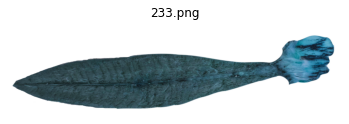

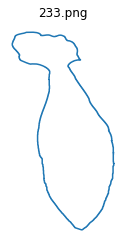

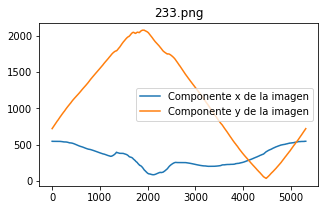

1610


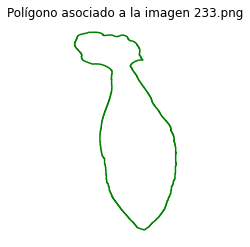

In [25]:
aleatoria=random.choice(imgs)
contor,im=getContour(ruta+aleatoria)
print(len(contor))
graf_imagen(im,aleatoria)
graf_contorno(contor,aleatoria)
graf_componentes(contor,aleatoria)
datos=graf_poligon(contor,aleatoria,0.2)
print(len(datos))

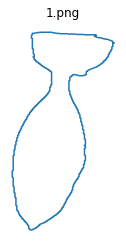

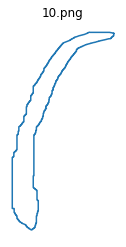

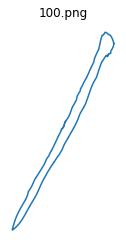

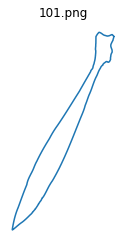

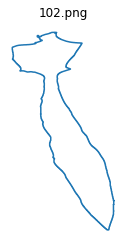

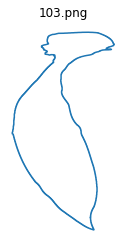

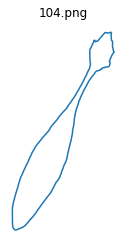

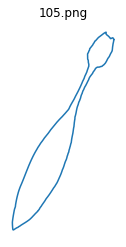

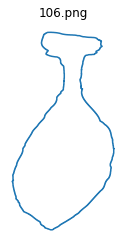

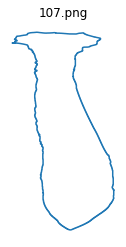

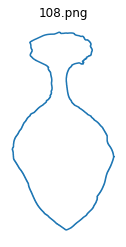

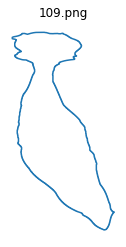

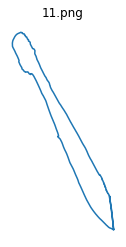

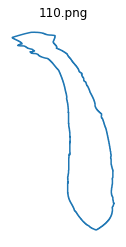

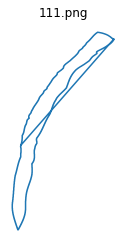

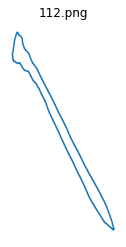

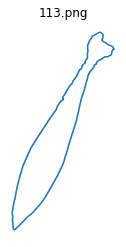

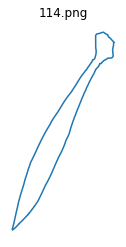

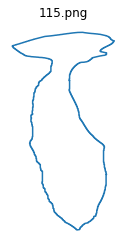

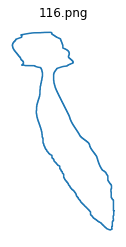

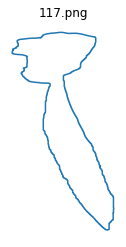

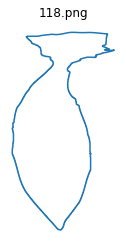

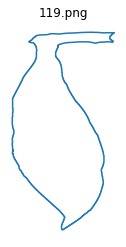

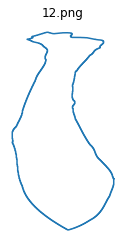

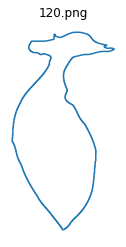

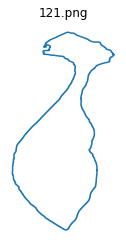

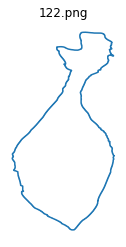

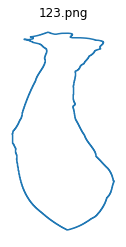

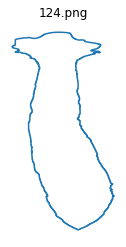

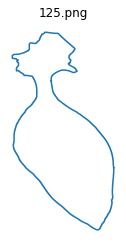

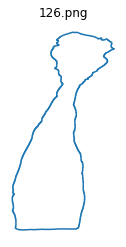

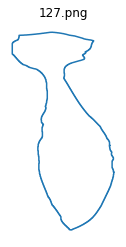

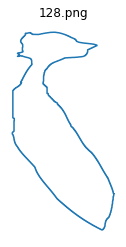

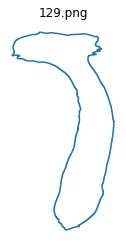

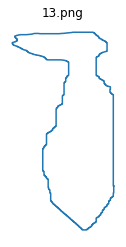

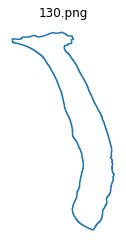

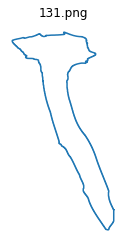

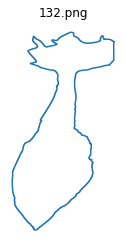

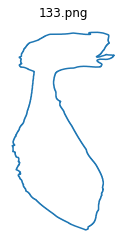

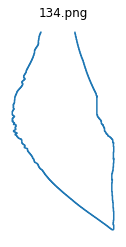

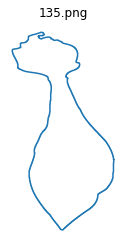

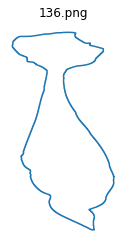

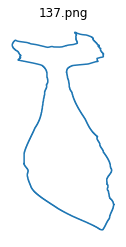

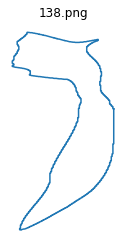

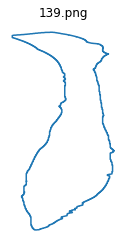

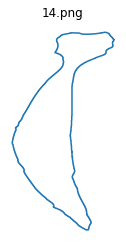

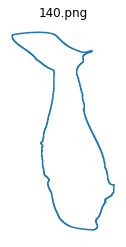

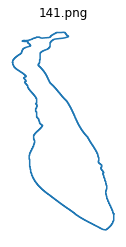

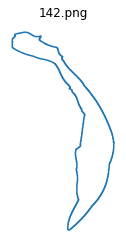

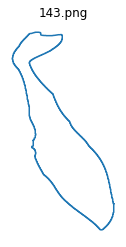

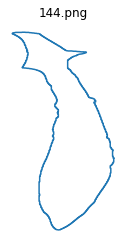

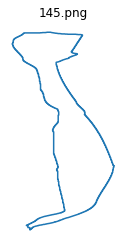

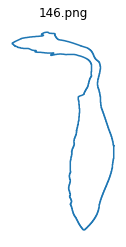

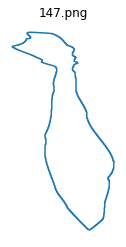

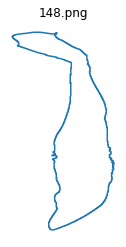

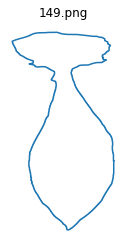

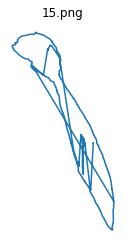

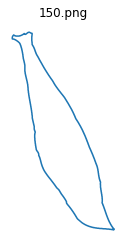

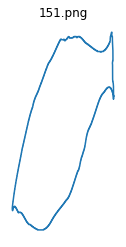

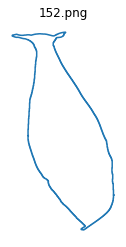

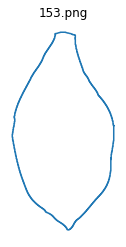

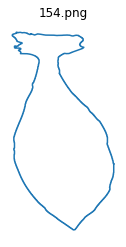

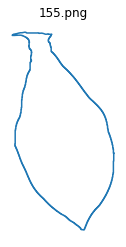

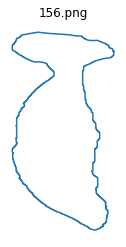

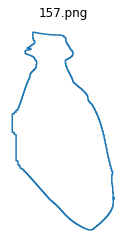

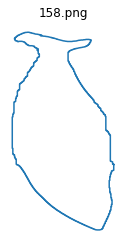

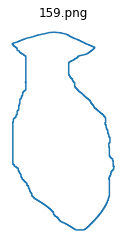

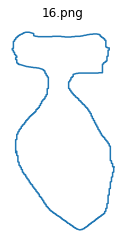

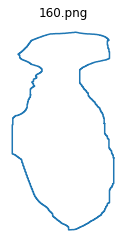

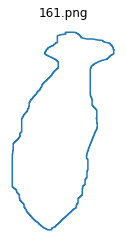

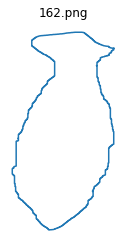

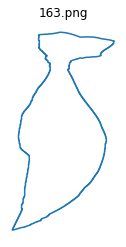

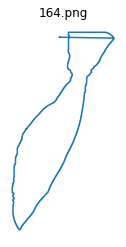

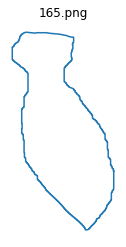

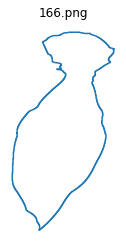

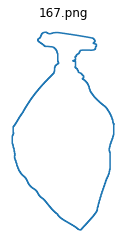

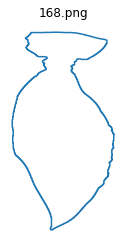

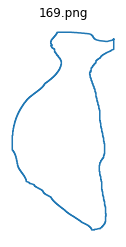

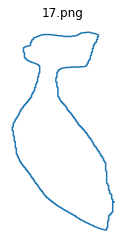

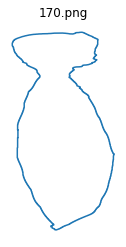

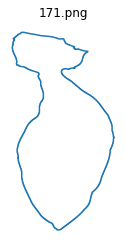

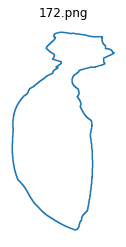

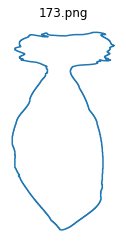

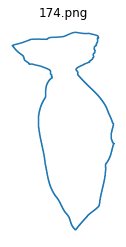

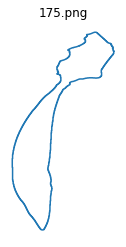

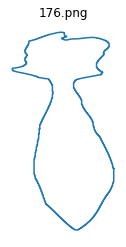

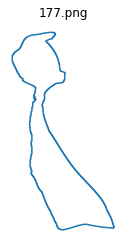

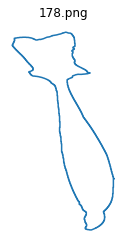

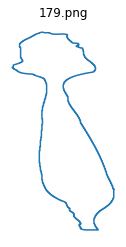

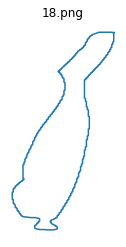

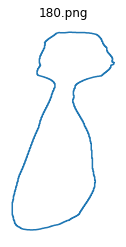

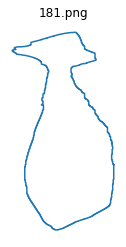

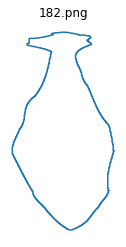

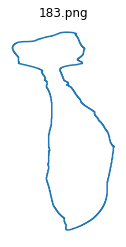

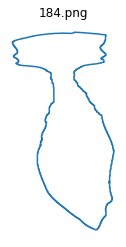

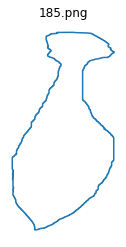

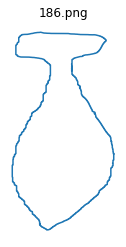

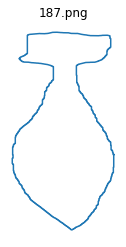

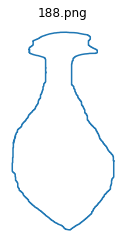

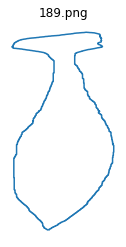

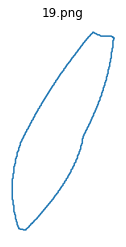

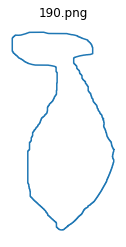

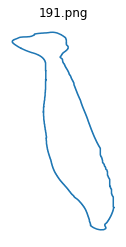

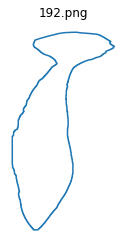

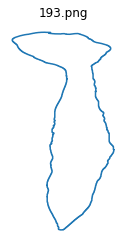

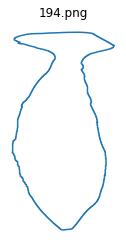

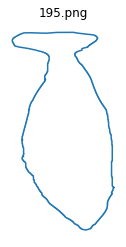

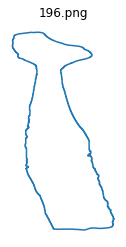

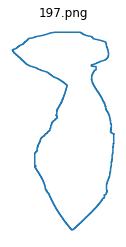

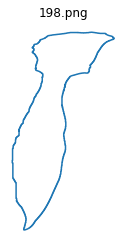

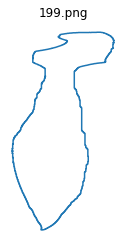

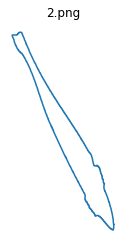

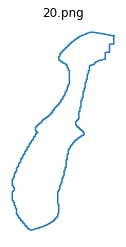

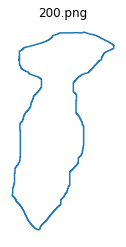

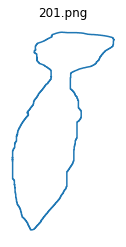

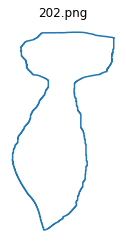

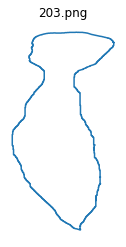

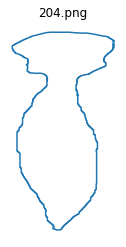

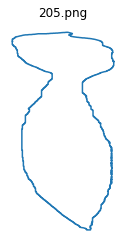

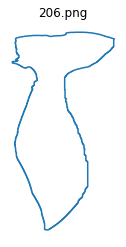

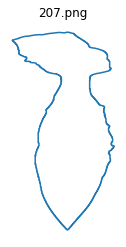

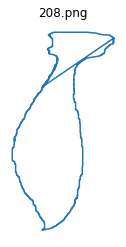

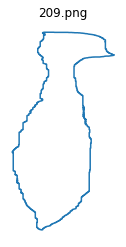

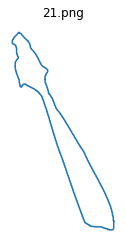

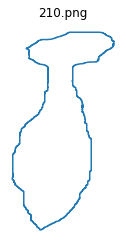

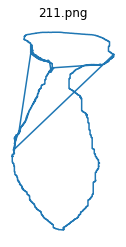

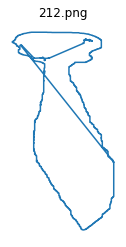

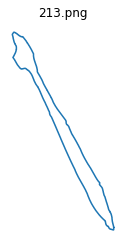

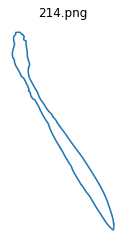

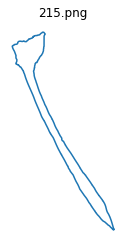

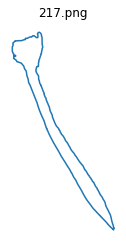

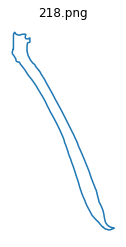

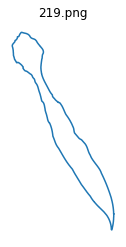

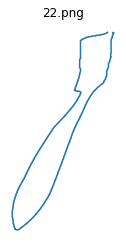

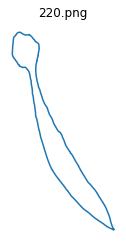

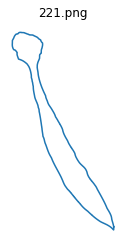

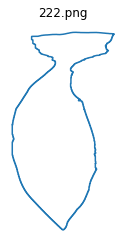

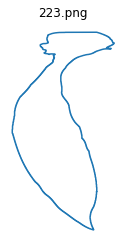

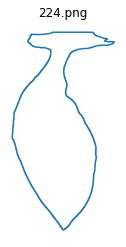

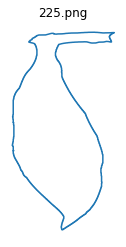

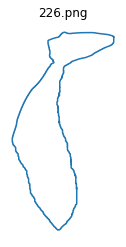

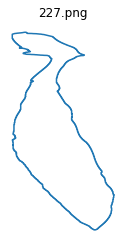

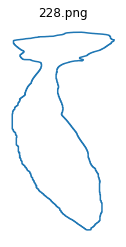

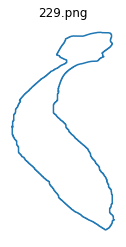

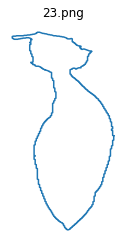

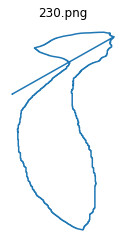

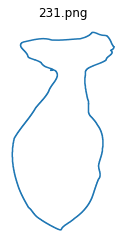

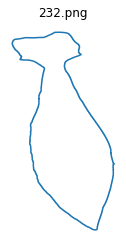

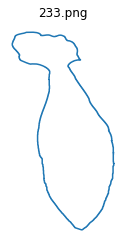

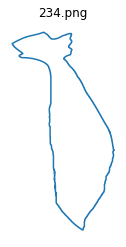

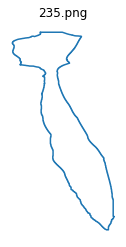

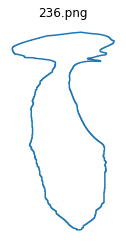

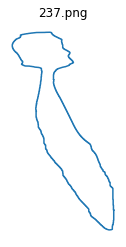

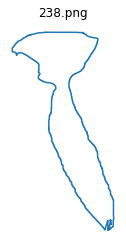

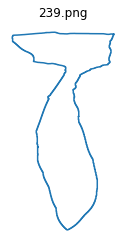

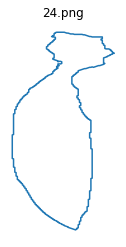

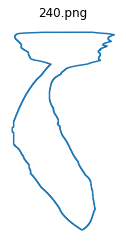

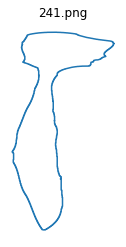

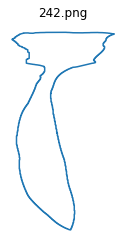

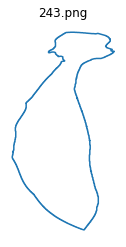

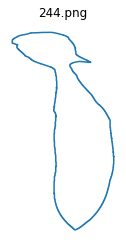

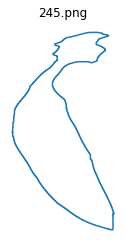

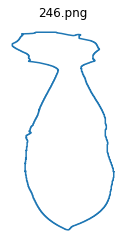

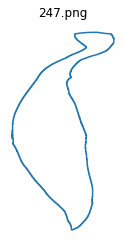

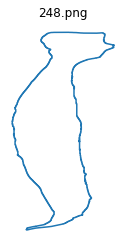

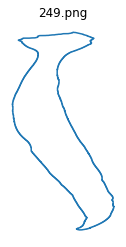

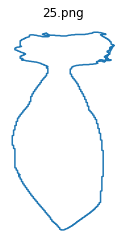

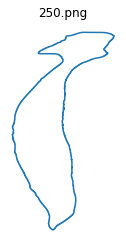

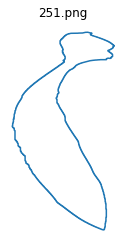

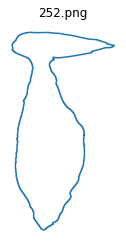

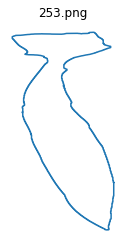

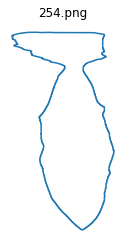

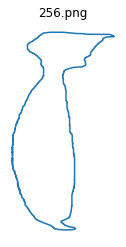

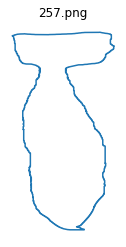

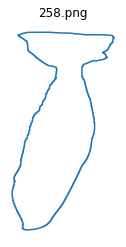

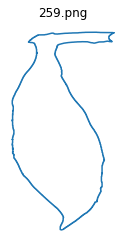

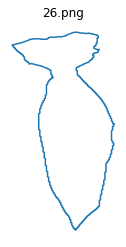

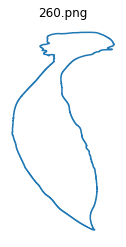

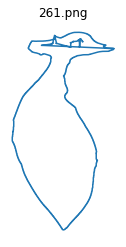

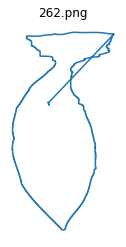

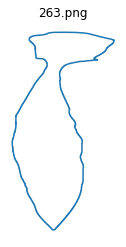

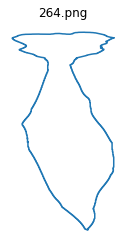

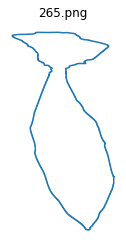

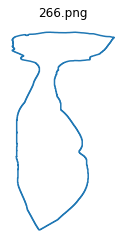

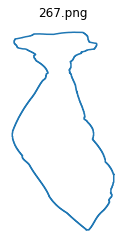

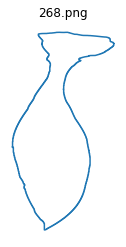

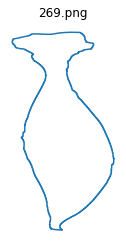

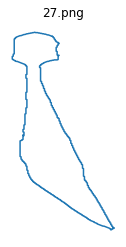

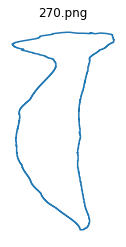

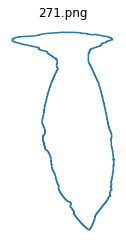

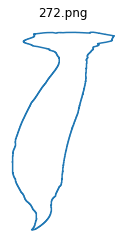

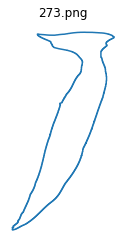

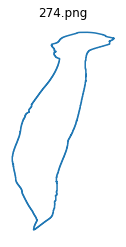

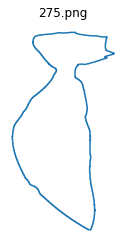

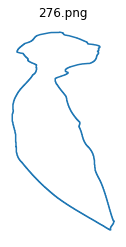

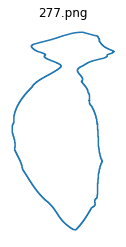

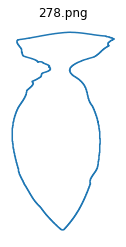

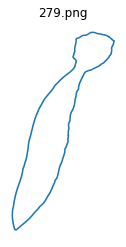

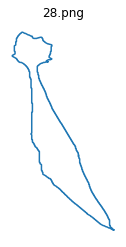

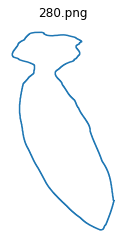

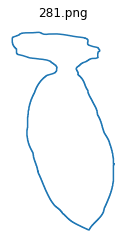

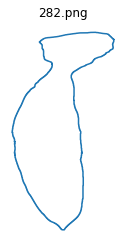

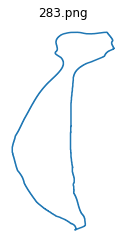

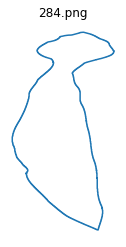

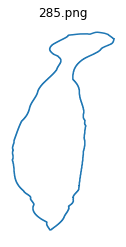

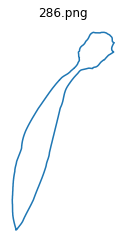

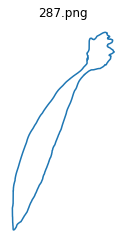

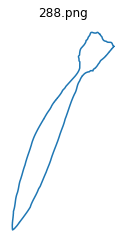

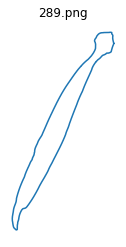

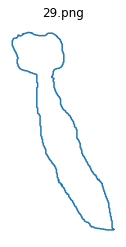

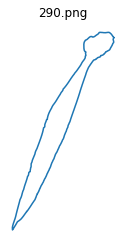

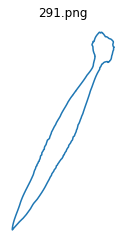

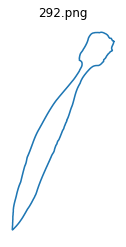

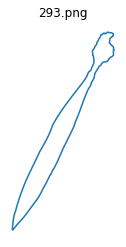

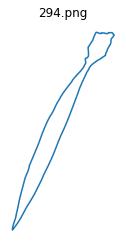

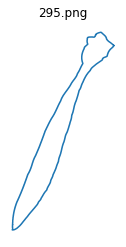

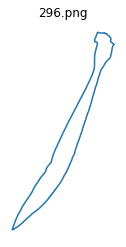

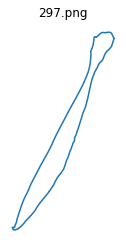

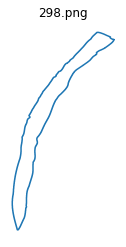

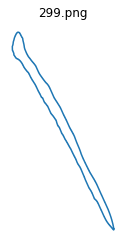

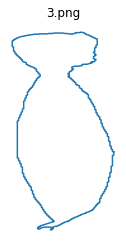

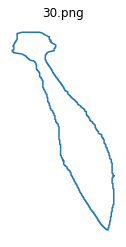

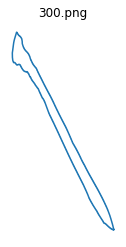

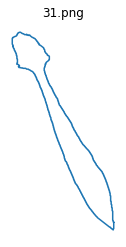

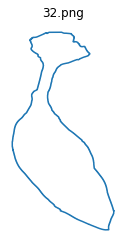

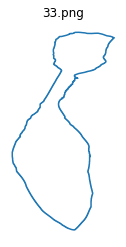

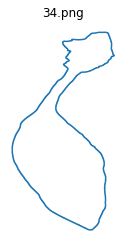

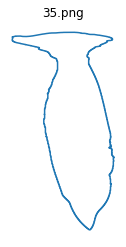

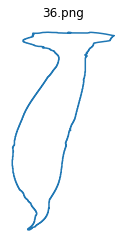

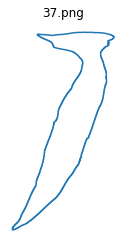

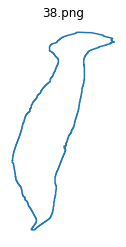

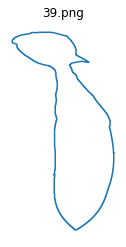

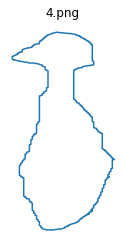

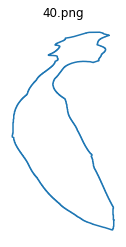

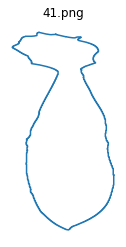

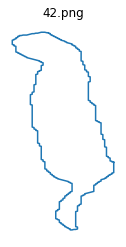

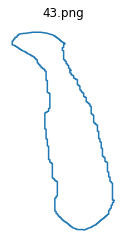

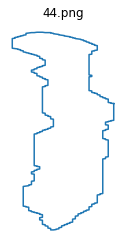

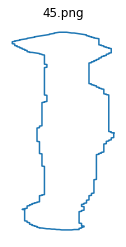

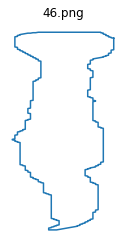

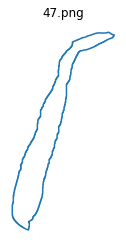

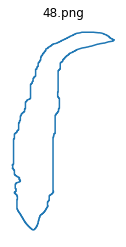

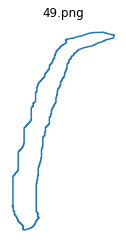

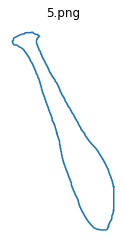

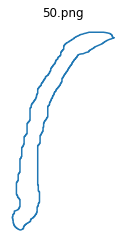

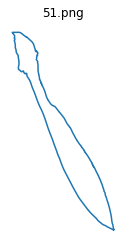

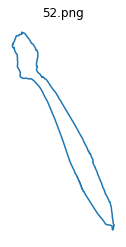

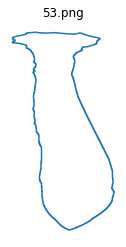

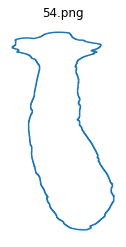

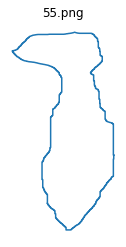

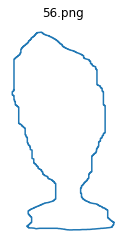

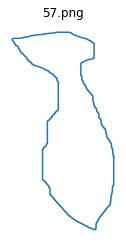

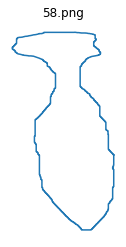

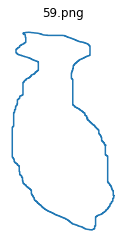

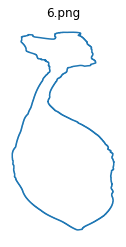

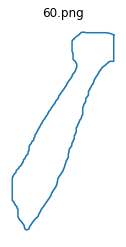

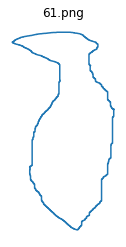

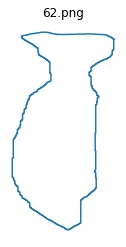

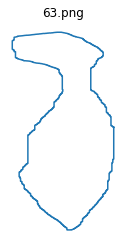

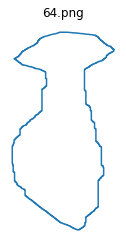

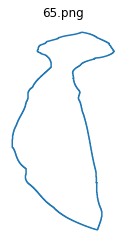

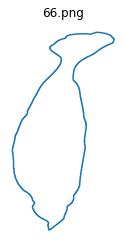

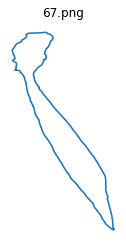

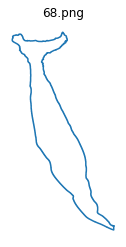

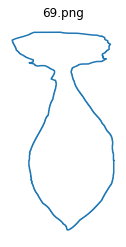

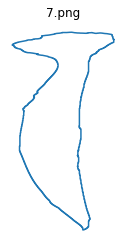

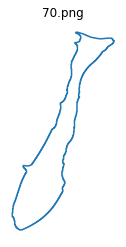

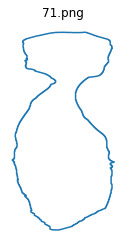

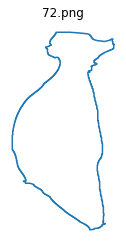

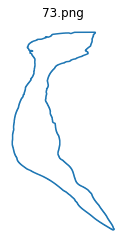

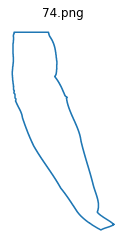

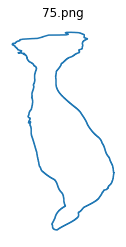

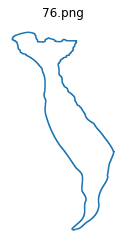

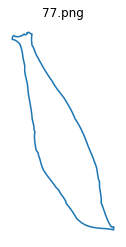

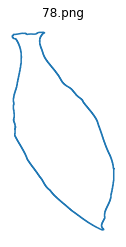

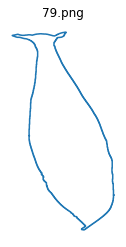

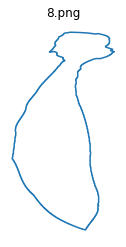

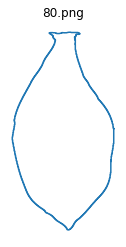

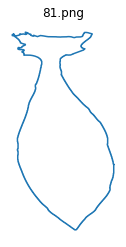

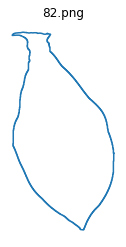

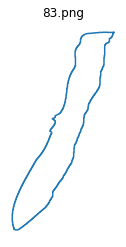

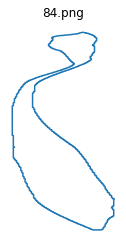

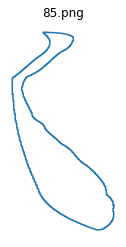

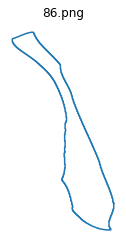

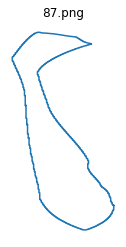

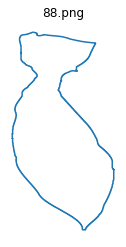

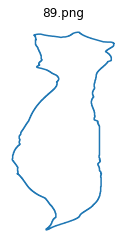

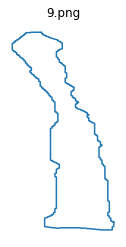

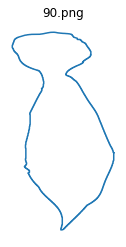

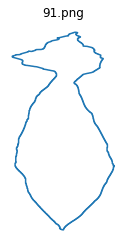

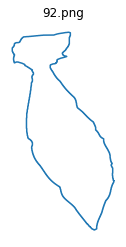

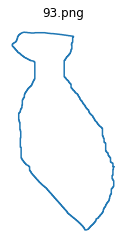

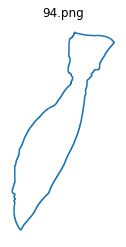

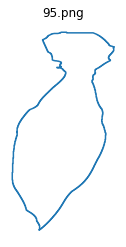

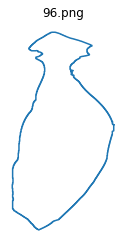

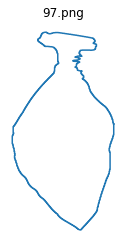

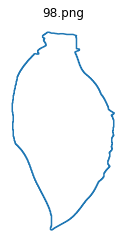

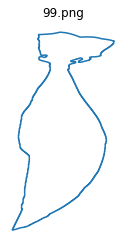

In [7]:
for path in imgs:
  if path!=".ipynb_checkpoints":
    contor,im=getContour(ruta+path)
    graf_contorno(contor,path)
  else:
    pass